In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import scipy.stats as ss
import math
import random

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

<h1>Linear Least Squares</h1>

We want to measure the strength of a relationship - similar to what we did with correlation, but we'll take it a bit further here. 

We'll start by taking a look at some datasets and some best fit lines. All of the sets below have identical mean/std/correlation and generate the exact same best fit line. But all lines do not appear to be created equal...

C:\Users\allyr\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


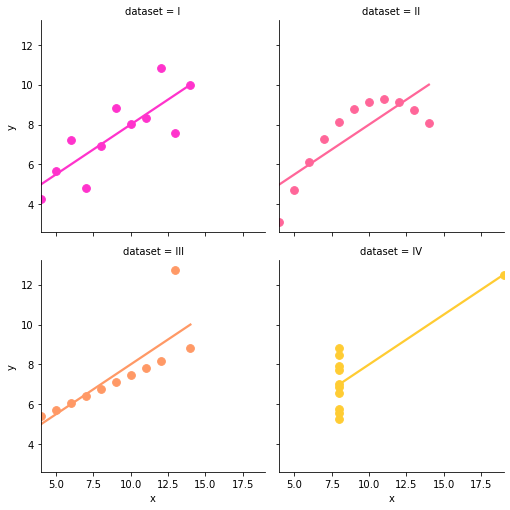

In [2]:
#Load anscombe and graph
ans = sns.load_dataset('anscombe')
sns.lmplot(x='x', y='y', col='dataset', hue='dataset', data=ans, col_wrap=2, ci=None, palette='spring', size=3.5, scatter_kws={'s': 60, 'alpha': 1})

<h4>All of the above are sets of data, along with lines of best fit. (This is the nerd-famous Anscombe's Quartlet)</h1>

Q: How do we determine how good the line of best fit is?

A: Try to minimize the distance between the line and point. More specifically, take that distance (the residual), square it, and minimize those values. That's a process called linear least squares. 

Why?
<ul>
<li>This deals with the negatives.
<li>The 'penalizes' the bad predictions.
<li>This is computationally efficient.
<li>If the model is a good fit for the data, this is a good estimator for the intercept and slope (this should add up later)
</ul>

In more plain language, we are trying to generate a best fit line (later to be a predictive model) that minimizes the squares of the residuals - so it cuts "through the middle" of all points. 

Load some more data.

We will look at the NBA data, and use the height to try to predict weight.  

In [3]:
#Run this for the NBA dataset. 

df = pd.read_csv("NBA.csv")
#df = df[df["Weight (lbs)"]>100]
#I don't want to type as much. 
h = "Height"
w = "Weight"
hw = df[['Height', 'Weight']]
hw = hw.dropna(axis=0)
hw = hw.dropna(axis=1)

Now that we have a dataset loaded, take a quick look

<AxesSubplot:xlabel='Height', ylabel='Weight'>

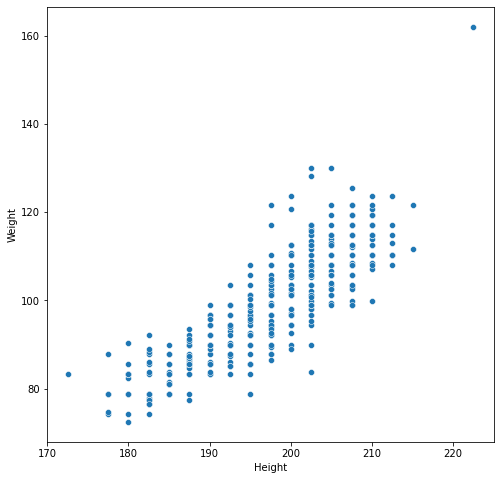

In [4]:
sns.scatterplot(data=hw, x=hw[h], y=hw[w])

There's a relationship here, looks like a pretty strong one! (Note you must get rid of any nan values, or the calculations will fail and you'll get non-answers)

We'll treat height as X here. So we are creating a model that aims to predict Y, given a value of X. Or if we know someone's height, we can generate a prediction for their weight. (For this simple calculation this model could calculate in either direction with some algebra, but the separation and labeling of inputs and output is important going forward.)

Creating a regression is pretty simple, conceptually. The LeastSquares function in thinkstats takes the inputs (X) and outputs (Y) can uses them to generate the intercept and slope, which are the two values we need to build the model (y = mx + b).

In [5]:
#Do regression
inter, slope = thinkstats2.LeastSquares(hw[h], hw[w])
res = thinkstats2.Residuals(hw[h], hw[w], inter, slope)
regLine = thinkstats2.FitLine(hw[h], inter, slope)
print("Y intercept:", inter)
print("Slope:", slope)

Y intercept: -136.1291023029115
Slope: 1.1932606957732674


<h4>What does this mean? Think back to high school math...</h4>

The slope is defined as the RISE/RUN, or deltaY / deltaX, or the change in weight per change in height. Here it indicates that for every 1 inch/cm (the datasets differ in units), the weight increases by SLOPE amount (in kg/lb).

The intercept is the value where x = 0, or the expected weight of a 0 height person here. This isn't really meaningful on its own here, but it does the job of giving us the defined point we need to calculate the line. Now, as long as we plug in a value for X (height) that calculation spits out a prediction for Y. 

So the end result is a predictive model for predicting Y - the height. We 'start' at the intercept for someone with a height of 0, then add one slope for each cm/inch taller that person gets. Add up all those increments (slope * height), and Bob's your uncle, that's the height prediction. In a formula WEIGHT = INTER + SLOPE * HEIGHT, or y=mx+b. 

<AxesSubplot:xlabel='Height', ylabel='Weight'>

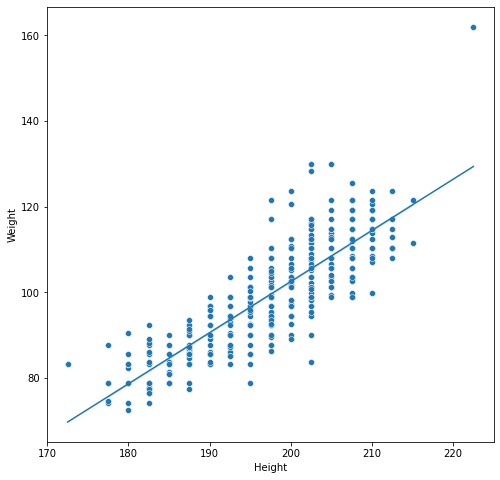

In [6]:
#Graph it.
#The fitline above calculates the line for us. For an exercise, try to implement a copy of that...
sns.scatterplot(x=hw[h], y=hw[w])
sns.lineplot(x=regLine[0], y=regLine[1])

<h3>Congrats!!! You've just built your first real life piece of Artifical Intellegence - a predictive model!! </h3>

This is what machine learning modesl do - take in what we know (height) and predict what we want (weight) Here the equation:
<ul>
<li>WEIGHT = SLOPE * HEIGHT + INTERCEPT
</ul>
Is the predictive model. You plug in the features/inputs, you get a prediction for the target. As we move to larger and more elaborate models, this basic process of creating and using a model holds:
<ol>
<li>We use some old data, where we have the answers (targets) to trail the model. This is the part where we use the data points to calculate the intercept and slope. That "calculate the intercept and slope" bit is what changes for each type of model from regression, to tree, to Bayes classification, to neural networks, etc... The math to translate from input (X values here) to output (Y values) is different, the the outcome is the same. 
<li>We test it for accuracy using some old data that we held out. We haven't done this here, we'll look at accuracy next time. 
<li>Once that model is created (i.e. we have the inter and slope) we can use it to make predictions for new data (we haven't done this yet here). To do so we plug in our inputs, and get a prediction for output. 
</ol>
<br>
We can try making some predictions with our new model...

In [8]:
#Use the model to make predictions. 
#Try your height! See how you fit in the NBA height model. 
#It might not be accurate for you, since pro atheletes don't really represent the population at large.
#There's a lot of sample bias here.
#The model is the y = mx + b calculation:
print("A 183cm tall person is expected to be:", slope*183 + inter, "kg")
print("A 208cm tall person is expected to be:", slope*208 + inter, "kg")
print("A 175cm tall person is expected to be:", slope*175 + inter, "kg")

A 183cm tall person is expected to be: 82.23760502359644 kg
A 208cm tall person is expected to be: 112.06912241792813 kg
A 175cm tall person is expected to be: 72.69151945741032 kg


If you want a shortcut for visualizing, Seaborn has a regression plot. 

<AxesSubplot:xlabel='Height', ylabel='Weight'>

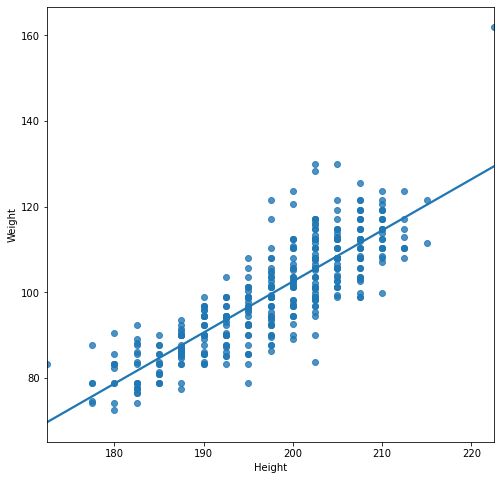

In [9]:
#Seaborn also has a built in regression plot. 
sns.regplot(x=hw[h], y=hw[w], ci=0)

<h4>Cool, regression!</h4>
We can also look at the residuals to start to understand the errors a bit...

If we look at our data and the regression line, it looks like the line does a pretty good job of estimating the data, but it isn't perfect. That distance from line to point is the residual. One thing we can do here is plot the residuals to see how they are distributed. 


When looking at these residual plots, the x asis is the normal height value. Each point's y value is its distance above or below the model - which is the horizontal line of 0. 

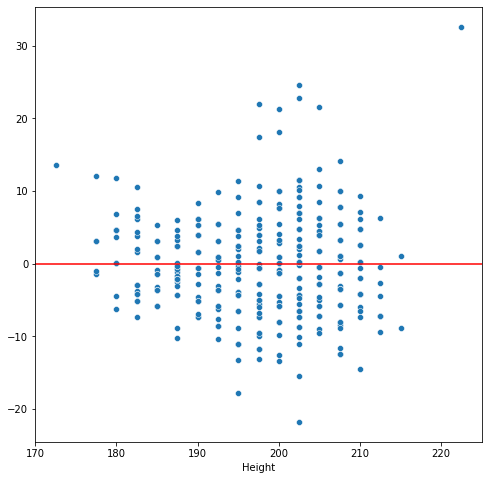

In [10]:
#Plot residuals directly
sns.scatterplot(x=hw[h], y=res)
plt.axhline(0, color="red")

<AxesSubplot:xlabel='Height', ylabel='Weight'>

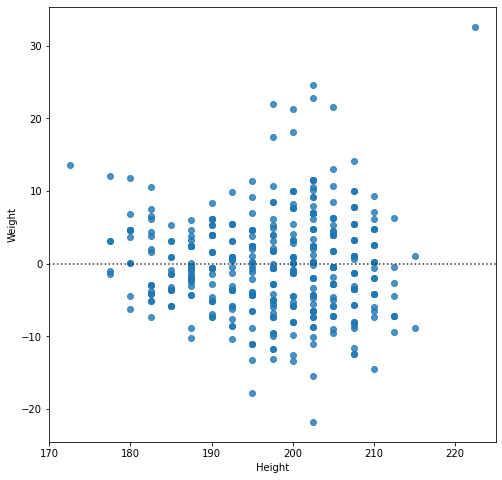

In [11]:
#Seaborn also has a built in residual plot. 
sns.residplot(x=hw[h], y=hw[w])

<h4>What do the residuals mean? Why look at them?</h4>

If we want a model (our linear regression) that accurately fits the data, we want the residuals to be random. Or, more directly, we don't want them to have any distinctive pattern. Why? Think about it... (we also want our residuals to be roughly normal, but we'll worry about that later)
<br><br>

We can go back to the Anscombe charts from before to look a bit more at the pattern of the residuals. 

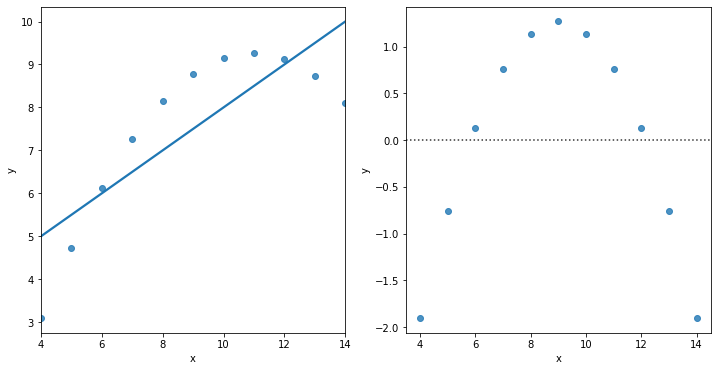

In [12]:
#Plot some residuals
tmp = ans[ans["dataset"] == "II"]
thinkplot.PrePlot(2,1,2)
sns.regplot(x=tmp["x"], y=tmp["y"], ci=0)
thinkplot.SubPlot(2)
sns.residplot(x=tmp["x"], y=tmp["y"])
thinkplot.Config()

<h4>What does this mean? Think about what we can gather from looking at the residuals and the pattern they make. </h4>

Obviously, this indicates the model does a bad job of modelling the data. Predictions at either end are way too high, predictions in the middle are way too low. 

There is consistency in the way the errors are distributed, so if we had a model that mirrored that consistency, that one would be a better fit. Ideally we'd want a model that predicted a little lower on either end of the range, and higher in the middle of the range. If there's a pattern like that in the data, we'd benefit from having that pattern in our model - we want to capture it, not leave it left over! For this one, we'd probably do a quadratic regression to better match the data's shape. 

Contrast that to set one, below. The model more or less splits the data down the middle, so the residuals are all over the place. There's no pattern to the error, so there's no big change for us to make to make it better fit the data. (This doesn't necissarily mean that it is super accurate, just that the linear model more or less fits the linear data - more on this later)

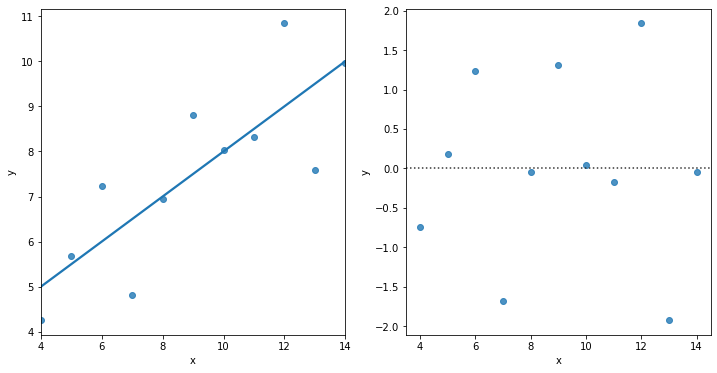

In [13]:
tmp2 = ans[ans["dataset"] == "I"]
thinkplot.PrePlot(2,1,2)
sns.regplot(x=tmp2["x"], y=tmp2["y"], ci=0)
thinkplot.SubPlot(2)
sns.residplot(x=tmp2["x"], y=tmp2["y"])
thinkplot.Config()

Real example:

In [19]:
breath = pd.read_csv("predict_breathe.csv")
breath.head()

,peaks_diff,period,oxigen_per_lit
0,417.119048,1.977599,0.766094
1,186.000000,9.950663,2.665403
2,273.000000,2.441032,1.438294
3,328.333333,2.419702,1.574147
4,296.666667,2.581060,1.526147


In [ ]:
inter1, slope1 = thinkstats2.LeastSquares(hw[h], hw[w])
res = thinkstats2.Residuals(hw[h], hw[w], inter, slope)
regLine = thinkstats2.FitLine(hw[h], inter, slope)
print("Y intercept:", inter1)
print("Slope:", slope1)

We can look at the relationship between peaks_diff and oxygen_per_lit. 

<AxesSubplot:xlabel='oxigen_per_lit', ylabel='peaks_diff'>

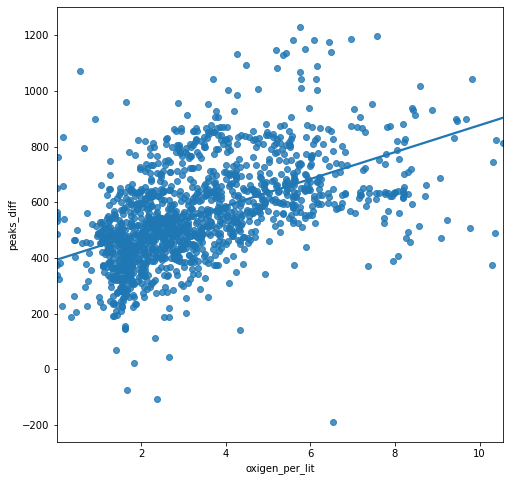

In [20]:
sns.regplot(x=breath["oxigen_per_lit"], y=breath["peaks_diff"], ci=0)

There's a relationship. We can now plot the residuals.


Look at the very bottom right residuals. As x gets larger, the difference in the real data and predicted values of y tend to be getting lower and lower. So the model isn't reliably predicting those ones. 

This is an indication of a non-linear relationship. 

<AxesSubplot:xlabel='oxigen_per_lit', ylabel='peaks_diff'>

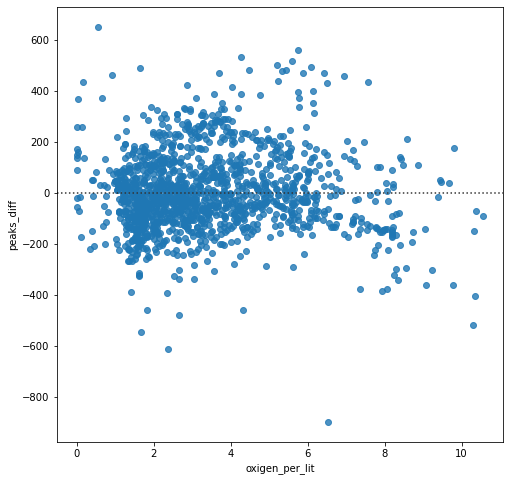

In [21]:
sns.residplot(x=breath["oxigen_per_lit"], y=breath["peaks_diff"])

In [25]:
inter1, slope1 = thinkstats2.LeastSquares(breath["oxigen_per_lit"], breath['peaks_diff'])
res2 = thinkstats2.Residuals(breath["oxigen_per_lit"], breath['peaks_diff'], inter1, slope1)
regLine2 = thinkstats2.FitLine(breath["oxigen_per_lit"], inter1, slope1)
print("Y intercept:", inter1)
print("Slope:", slope1)

Y intercept: 393.2903409874816
Slope: 48.351046855923016


<h2>What about if we want to use some external package? What does that look like?</h2>

First we'll use scikitlearn, then an example of the statsmodels output of details. 

In [26]:
#Setup
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection

In [31]:
hw[h].shape, hw[h]

((422,),
 0      185.0
 1      180.0
 2      202.5
 3      205.0
 4      205.0
        ...  
 485    195.0
 486    192.5
 487    202.5
 488    207.5
 489    192.5
 Name: Height, Length: 422, dtype: float64)

In [32]:
a = np.array(hw[h]).reshape(-1,1)
a.shape, a

((422, 1),
 array([[185. ],
        [180. ],
        [202.5],
        [205. ],
        [205. ],
        [205. ],
        [195. ],
        [195. ],
        [210. ],
        [212.5],
        [195. ],
        [215. ],
        [202.5],
        [195. ],
        [195. ],
        [202.5],
        [192.5],
        [207.5],
        [195. ],
        [187.5],
        [197.5],
        [210. ],
        [202.5],
        [210. ],
        [202.5],
        [200. ],
        [205. ],
        [192.5],
        [192.5],
        [202.5],
        [205. ],
        [192.5],
        [207.5],
        [190. ],
        [185. ],
        [187.5],
        [192.5],
        [205. ],
        [202.5],
        [205. ],
        [200. ],
        [200. ],
        [192.5],
        [200. ],
        [205. ],
        [182.5],
        [187.5],
        [195. ],
        [210. ],
        [182.5],
        [210. ],
        [202.5],
        [182.5],
        [185. ],
        [202.5],
        [202.5],
        [202.5],
        [200. ],
   

In order for the model to work, we need our data to be "vertical" - think of the data on a spreasheet: each feature is a vertical column, each piece of data is a row. The input varaible(s) (features) are the x values, the output (target) are the y values. The shape value shows the shape in rows x columns format. 

In this example we're using all the data to train the model. Normally we'd split it into training and testing sets, using one part to train the model, and the other to caclulate estimates of accuracy. 

In [27]:
#Deal with data
#ensure that the inputs and outputs are the right shape.
#The -1 means basically "make it one column" in this use. 
x = np.array(hw[h]).reshape(-1,1)
y = np.array(hw[w]).reshape(-1,1)
x.shape, y.shape

((422, 1), (422, 1))

If our data is ready, all we need to do is train the model, or fit it to the data. We give it our training data so it can learn how to predict Y from X. 

In [140]:
#Generate Model
# Create an instance of a linear regression model and fit it to the data with the fit() function:
model = LinearRegression().fit(x, y) 


<b>That's it! We've created a predictive model. Now we can get a result and use it. </b>

In [141]:
#Get the results of generating the model

#Note: some results come wrapped in an array, that's what the [0]s are for. Remove them to see the true return. 
# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(x, y)
print('Coefficient of determination (more on this later):', r_sq)
# Print the Intercept:
print('Intercept:', model.intercept_[0])
# Print the Slope:
print('Slope:', model.coef_[0][0]) 

Coefficient of determination (more on this later): 0.7115154555772258
Intercept: -136.12910230291146
Slope: 1.1932606957732674


Ok, use the model and make some predictions. I'll use the examples from above that we did by hand:

In [142]:
#Generate predictions. 
#Note - you need to provide the values to predict in an array that is one column wide. 
#Generally you'd make an array of all the things you want to predict and do them en-masse. 
print("A 183cm tall person is expected to be:", model.predict(np.array(183).reshape(-1,1))[0][0], "kg")
print("A 208cm tall person is expected to be:", model.predict(np.array(208).reshape(-1,1))[0][0], "kg")
print("A 175cm tall person is expected to be:", model.predict(np.array(175).reshape(-1,1))[0][0], "kg")

A 183cm tall person is expected to be: 82.23760502359647 kg
A 208cm tall person is expected to be: 112.06912241792816 kg
A 175cm tall person is expected to be: 72.69151945741035 kg


Lastly, we can graph it. 

<AxesSubplot:xlabel='X', ylabel='Y'>

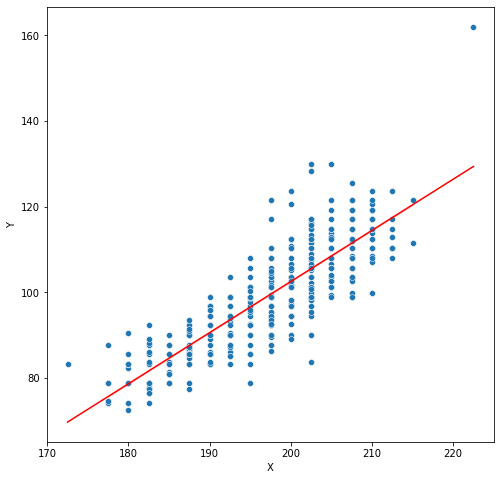

In [143]:
#I'll make a df for ease of use. 
dat = pd.DataFrame(data=np.column_stack((x,y)),columns=['X','Y'])
sns.scatterplot(data=dat, x="X", y="Y")

#Generate the line
inter = model.intercept_[0]
slo = model.coef_[0][0]
inter, slo
lineInf = thinkstats2.FitLine(dat["X"], inter, slo)
sns.lineplot(x=lineInf[0], y=lineInf[1], color="red")

#Probably easier to just use a regplot! 

Above is the complete process of making a linear regression model, without the testing steps. 

Statsmodels has similar functionality, but is more focused on stats (duh) and less on machine learning. The benefit to using statsmodels is that it 

In [144]:
#Statsmodels gives us more elaborate results. 
import statsmodels.api as sm

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1036.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          1.95e-115
Time:                        12:26:45   Log-Likelihood:                -1397.2
No. Observations:                 422   AIC:                             2798.
Df Residuals:                     420   BIC:                             2807.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -136.1291      7.327    -18.578      0.0

Most of this is stuff that we'll look at next time, to examine accuracy and fit of this model to the data, and evaluating its usefullness in making predictions. 

And now we can use the model to make some predictions. This part is kind of odd in how it is setup with statsmodels:

In [145]:
toPred = np.array([183, 208, 175])
x_test = sm.add_constant(toPred)
ypred = est2.predict(x_test)
print(ypred)

[ 82.23760502 112.06912242  72.69151946]


<h3>Now you do it!</h3>
<ul>
<li>Do a regression, both via the simple way and via a statsmodel or scikitlearn package. In particular, try to do the array arranging of data. 
<li>Chart the data with a regression line, and the residuals. Try more than one way.
<li>Use the model to make a prediction for your height, or the heights of your friends.
</ul>

In [149]:
#Run this for the NFL dataset

df2 = pd.read_csv("NFL.csv")
df2 = df2[df2["Weight (lbs)"]>100]
#I don't want to type as much. 
h2 = "Height (inches)"
w2 = "Weight (lbs)"
#df.columns
hw2 = df2[['Height (inches)', 'Weight (lbs)']]
hw2 = hw2.dropna(axis=0)
hw2 = hw2.dropna(axis=1)

In [147]:
#Go....